In [2]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Load data

In [3]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")

In [4]:
# 550 data with 300 features
print(x_train.shape)

(550, 300)


In [5]:
# It's a binary classification problem 
print(np.unique(y_train))

[0 1]


## Question 1
K-fold data partition: Implement the K-fold cross-validation function. Your function should take K as an argument and return a list of lists (len(list) should equal to K), which contains K elements. Each element is a list contains two parts, the first part contains the index of all training folds, e.g. Fold 2 to Fold 5 in split 1. The second part contains the index of validation fold, e.g. Fold 1 in  split 1

In [124]:
def cross_validation(x_train, y_train, k=5):
  arr = np.arange(len(x_train))

  # random sequence
  np.random.shuffle(arr)

  #split into k-size arrays
  split = np.array_split(arr, k)

  lists = []
  for i in range(len(split)):
    current_list = []
    first_list = np.delete(arr, split[i])
    second_list = split[i]
    current_list.append(first_list)
    current_list.append(second_list)
    lists.append(current_list)
  return lists

In [99]:
kfold_data = cross_validation(x_train, y_train, k=10)
assert len(kfold_data) == 10 # should contain 10 fold of data
assert len(kfold_data[0]) == 2 # each element should contain train fold and validation fold
assert kfold_data[0][1].shape[0] == 55 # The number of data in each validation fold should equal to training data divieded by K

## example

In [100]:
from sklearn.model_selection import KFold

X = np.arange(20)
kf = KFold(n_splits=5, shuffle=True)
kfold_data= []
for i, (train_index, val_index) in enumerate(kf.split(X)):
    print("Split: %s, Training index: %s, Validation index: %s" % (i+1, train_index, val_index))
    kfold_data.append([train_index, val_index])

Split: 1, Training index: [ 0  1  2  3  4  5  6  7  8  9 10 12 14 17 18 19], Validation index: [11 13 15 16]
Split: 2, Training index: [ 1  3  4  6  7  8  9 11 12 13 14 15 16 17 18 19], Validation index: [ 0  2  5 10]
Split: 3, Training index: [ 0  1  2  3  5  6  7  8 10 11 12 13 15 16 17 19], Validation index: [ 4  9 14 18]
Split: 4, Training index: [ 0  1  2  4  5  7  9 10 11 12 13 14 15 16 18 19], Validation index: [ 3  6  8 17]
Split: 5, Training index: [ 0  2  3  4  5  6  8  9 10 11 13 14 15 16 17 18], Validation index: [ 1  7 12 19]


In [125]:
assert len(kfold_data) == 5 # should contain 5 fold of data
assert len(kfold_data[0]) == 2 # each element should contains index of training fold and validation fold
assert kfold_data[0][1].shape[0] == 4 # The number of data in each validation fold should equal to training data divieded by K

## Question 2
Using sklearn.svm.SVC to train a classifier on the provided train set and conduct the grid search of “C” and “gamma” to find the best parameters by cross-validation.

In [119]:
## your code
gammas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
Cs = [0.01, 0.1, 1, 10, 100, 1000, 10000]
result = []
datas = cross_validation(x_train, y_train, k=5)
best_accuracy = 0
best_parameters = [0, 0]
best_model = None
for C in Cs:
  tmp = []
  for gamma in gammas:
    clf = SVC(C=C, kernel='rbf', gamma=gamma)
    accuracies = []
    for data in datas:
      clf.fit(x_train[data[0]], y_train[data[0]])
      accuracies.append(clf.score(x_train[data[1]], y_train[data[1]]))
    current_accuracy = np.mean(accuracies)
    if current_accuracy>best_accuracy:
      best_parameters = [gamma, C]
      best_accuracy = current_accuracy
      best_model = clf
    tmp.append(np.mean(accuracies))
  result.append(tmp)

In [121]:
print(best_parameters)

[0.001, 10]


## Question 3
Plot the grid search results of your SVM. The x, y represents the hyperparameters of “gamma” and “C”, respectively. And the color represents the average score of validation folds
You reults should be look like this reference image below ![image](https://miro.medium.com/max/1296/1*wGWTup9r4cVytB5MOnsjdQ.png) 

[Text(0, 0, '0.01'),
 Text(0, 0, '0.1'),
 Text(0, 0, '1'),
 Text(0, 0, '10'),
 Text(0, 0, '100'),
 Text(0, 0, '1000'),
 Text(0, 0, '10000')]

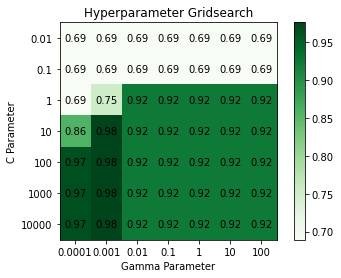

In [122]:
fig, ax = plt.subplots()
plt.title('Hyperparameter Gridsearch')
plt.xlabel('Gamma Parameter')
plt.ylabel('C Parameter')
data = result

ax.imshow(data, cmap='Greens')

# set the interval of the ticks
ax.set_xticks(np.arange(np.array(Cs).shape[0]), minor=False)
ax.set_yticks(np.arange(np.array(gammas).shape[0]), minor=False)

# show data value in the grid
for (i, j), z in np.ndenumerate(data):
    ax.text(j, i, '{:.2f}'.format(z), ha='center', va='center')

# show colorbar
fig.colorbar(ax.imshow(data, cmap='Greens', interpolation='none'))
ax.xaxis.tick_bottom()
ax.set_xticklabels(gammas)
ax.set_yticklabels(Cs)

## Question 4
Train your SVM model by the best parameters you found from question 2 on the whole training set and evaluate the performance on the test set.

In [123]:
y_pred = best_model.predict(x_test)
print("Accuracy score: ", accuracy_score(y_pred, y_test))

Accuracy score:  0.9114583333333334
